In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Define the directory containing the NPZ files
npz_dir = '../quant_notes/data_cmpr/train'

# List all NPZ files in the directory
npz_files = [f for f in os.listdir(npz_dir) if f.endswith('.npz')]

# Initialize a list to hold metadata and a dictionary for large arrays
metadata_list = []
rnflt_dict = {}
rnflt_with_glaucoma = []
rnflt_without_glaucoma = []

# Load and process each NPZ file
for file in npz_files:
    file_path = os.path.join(npz_dir, file)
    data = np.load(file_path)
    
    # Extract the identifier from the file name
    identifier = int(file.split('_')[1].split('.')[0])
        
    # Create a dictionary for the metadata
    metadata = {
        'id': identifier,
        'md': float(data['md']),
        'glaucoma': int(data['glaucoma']),
        'tds': data['tds'].tolist(),  # Convert to list for better compatibility with DataFrame
        'race': str(data['race']),
        'male': int(data['male']),
        'hispanic': int(data['hispanic']),
        'language': int(data['language']),
        'maritalstatus': int(data['maritalstatus']),
        'age': float(data['age'])
    }
    
    if data['glaucoma'] == 1:
        rnflt_with_glaucoma.append(data['rnflt'])
    else:
        rnflt_without_glaucoma.append(data['rnflt'])
    
    # Append the metadata to the list
    metadata_list.append(metadata)
    
    # Store the large array separately
    rnflt_dict[identifier] = data['rnflt']

# Convert the metadata list to a DataFrame
metadata_df = pd.DataFrame(metadata_list)

ethnicity_map = {0: 'Non-Hispanic', 1: 'Hispanic', -1: 'Unknown'}
language_map = {0: 'English', 1: 'Spanish', 2: 'Others', -1: 'Unknown'}
marital_status_map = {0: 'Married/Civil Union, Life Partner', 1: 'Single', 2: 'Divorced', 3: 'Widowed', 4: "Legally Separated", -1: 'Unknown'}
gender_map = {0: 'Female', 1: 'Male'}

# Replace numerical values with strings in the DataFrame
metadata_df['hispanic'] = metadata_df['hispanic'].map(ethnicity_map)
metadata_df['language'] = metadata_df['language'].map(language_map)
metadata_df['maritalstatus'] = metadata_df['maritalstatus'].map(marital_status_map)
metadata_df['male'] = metadata_df['male'].map(gender_map)

rnflt_np = np.array(list(rnflt_dict.values()))
rnflt_with_glaucoma_np = np.stack(rnflt_with_glaucoma)
rnflt_without_glaucoma_np = np.stack(rnflt_without_glaucoma)

In [3]:
rnflt_with_glaucoma_np.shape, rnflt_without_glaucoma_np.shape

((1083, 200, 200), (1017, 200, 200))

In [4]:
metadata_df.describe()

,id,md,glaucoma,age
count,2100.000000,2100.000000,2100.000000,2100.000000
mean,1050.500000,-4.580219,0.515714,58.420476
std,606.362103,6.275897,0.499872,16.828922
min,1.000000,-31.990000,0.000000,10.120548
25%,525.750000,-6.642500,0.000000,47.576712
50%,1050.500000,-3.185000,1.000000,60.790411
75%,1575.250000,-0.180000,1.000000,71.273288
max,2100.000000,2.270000,1.000000,97.956164


In [5]:
metadata_df.head(100)

,id,md,glaucoma,tds,race,male,hispanic,language,maritalstatus,age
0,9,-5.83,1,"[-5.0, -5.0, -14.0, -13.0, -4.0, -3.0, -4.0, -...",White or Caucasian,Male,Non-Hispanic,English,Divorced,61.846575
1,1061,-6.47,1,"[-4.0, -8.0, -10.0, -12.0, -8.0, -6.0, -7.0, -...",Black or African American,Female,Non-Hispanic,English,Single,67.224658
2,1722,-10.18,1,"[-13.0, -12.0, -6.0, -2.0, -13.0, -6.0, -9.0, ...",Asian,Male,Non-Hispanic,English,Unknown,67.961644
3,932,-3.13,1,"[-6.0, -7.0, -2.0, -5.0, 1.0, 0.0, -2.0, -1.0,...",Black or African American,Male,Non-Hispanic,English,"Married/Civil Union, Life Partner",76.605479
4,1675,1.96,0,"[3.0, 4.0, 2.0, 1.0, 0.0, 2.0, 3.0, 1.0, 3.0, ...",Black or African American,Male,Non-Hispanic,English,Single,44.391781
...,...,...,...,...,...,...,...,...,...,...
95,1886,-3.86,1,"[-6.0, -3.0, -6.0, -6.0, -4.0, -2.0, -3.0, -2....",Asian,Male,Non-Hispanic,Unknown,"Married/Civil Union, Life Partner",68.517808
96,441,-14.10,1,"[-2.0, -5.0, -25.0, -23.0, -10.0, -4.0, -4.0, ...",White or Caucasian,Male,Non-Hispanic,English,Single,59.797260
97,447,-0.63,0,"[3.0, 2.0, -1.0, 2.0, -4.0, 0.0, 0.0, 0.0, 1.0...",White or Caucasian,Male,Non-Hispanic,English,"Married/Civil Union, Life Partner",74.205479
98,1494,0.48,0,"[3.0, 3.0, 1.0, 0.0, 2.0, 1.0, 2.0, 1.0, -1.0,...",Asian,Female,Unknown,English,"Married/Civil Union, Life Partner",41.104110


In [6]:
rnflt_np.shape

(2100, 200, 200)

In [7]:
rnflt_np.mean(), rnflt_np.min(), rnflt_np.max(), rnflt_np.std(), 

(65.85589977352136, -2.0, 1032.25584, 45.48568981397953)

In [8]:
rnflt_dict[1]

array([[ 0.     ,  0.     , 43.01066, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , 44.96569, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , 43.01066, ...,  0.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     , 48.87575, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , 48.87575, ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , 48.87575, ...,  0.     ,  0.     ,  0.     ]])

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(rnflt_np.flatten().reshape(-1, 1))
scaler.center_, scaler.scale_, scaler.transform(rnflt_np[1].flatten().reshape(-1, 1))

(array([56.69587]),
 array([43.01066]),
 array([[-1.31818182],
        [-1.31818182],
        [-0.81818182],
        ...,
        [-1.31818182],
        [-1.31818182],
        [-1.31818182]]))

In [18]:
scl2 = RobustScaler()
scl2.center_ =  56.69587 #scaler.center_
scl2.scale_ = 43.01066 # scaler.scale_
out = scl2.transform(rnflt_np[1].flatten().reshape(-1, 1))
out.max(), out.min(), out.mean(), out.std(), out

(2.9999999999999996,
 -1.364681918389534,
 -0.05118680274843493,
 0.6761200292614958,
 array([[-1.31818182],
        [-1.31818182],
        [-0.81818182],
        ...,
        [-1.31818182],
        [-1.31818182],
        [-1.31818182]]))

: 

(array([6.9864989e+07, 1.3341580e+07, 6.3291900e+05, 8.1511000e+04,
        3.6796000e+04, 2.2464000e+04, 1.3388000e+04, 3.9380000e+03,
        1.3710000e+03, 1.0440000e+03]),
 array([  -2.      ,  101.425584,  204.851168,  308.276752,  411.702336,
         515.12792 ,  618.553504,  721.979088,  825.404672,  928.830256,
        1032.25584 ]),
 <BarContainer object of 10 artists>)

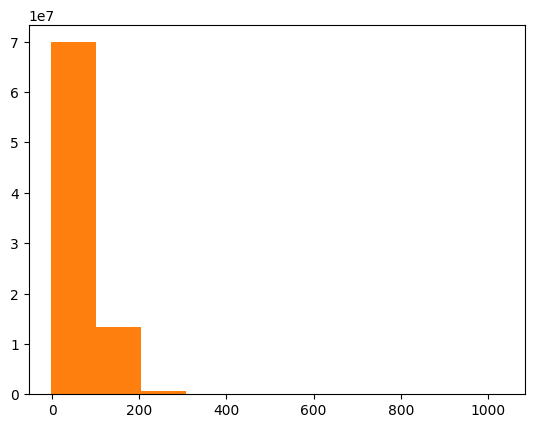

In [16]:
# plt.hist(out)
# plt.hist(rnflt_np.flatten())

With Glaucoma:		Mean = 62.49, Min = -0.52, Max = 129.11
Without Glaucoma:	Mean = 69.44, Min = -0.85, Max = 172.56


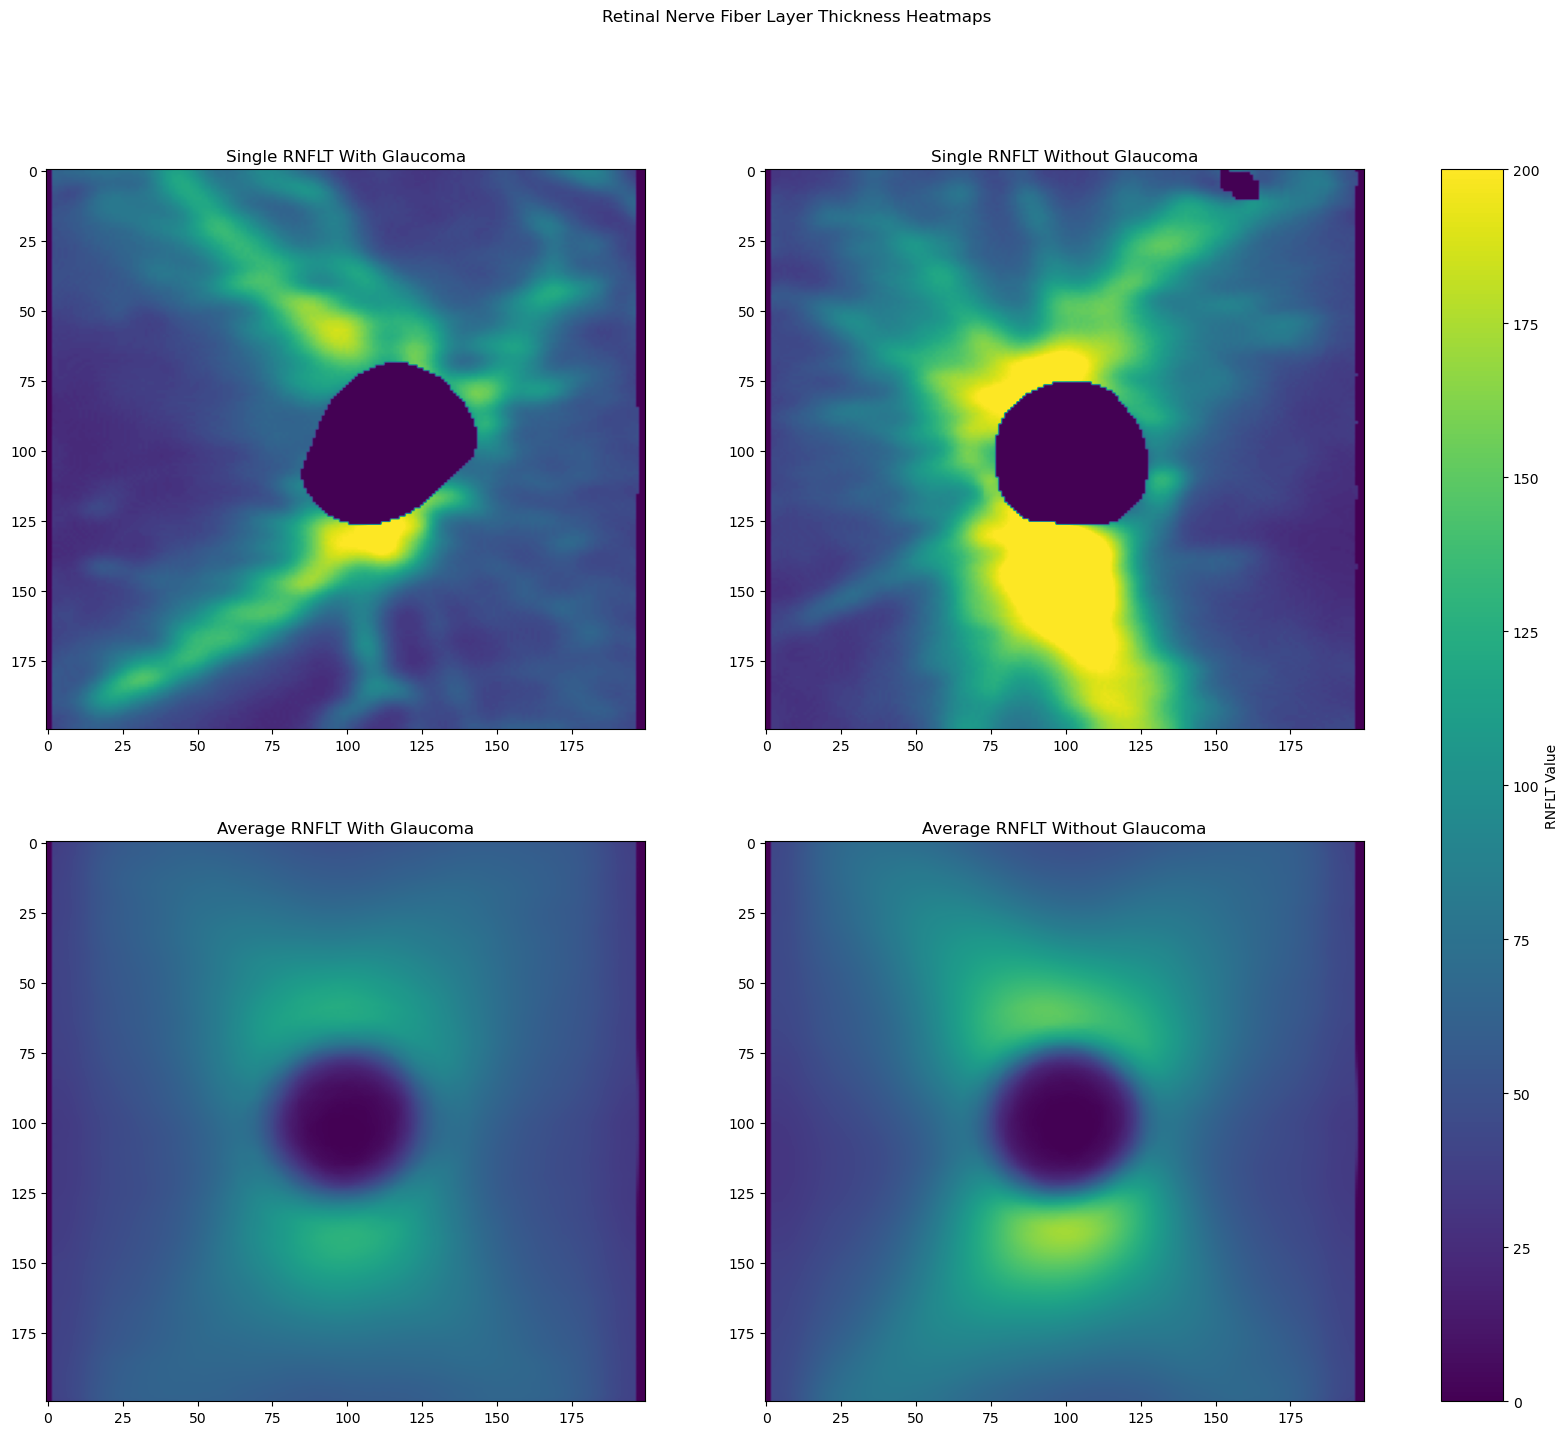

In [9]:
single_rnflt_glaucoma = rnflt_with_glaucoma_np[0]
single_rnflt_no_glaucoma = rnflt_without_glaucoma_np[0]

# Calculate the mean of rnflt arrays for each group
mean_rnflt_glaucoma = rnflt_with_glaucoma_np.mean(axis=0)
mean_rnflt_no_glaucoma = rnflt_without_glaucoma_np.mean(axis=0)

print(f"With Glaucoma:\t\tMean = {mean_rnflt_glaucoma.mean():.2f}, Min = {mean_rnflt_glaucoma.min():.2f}, Max = {mean_rnflt_glaucoma.max():.2f}")
print(f"Without Glaucoma:\tMean = {mean_rnflt_no_glaucoma.mean():.2f}, Min = {mean_rnflt_no_glaucoma.min():.2f}, Max = {mean_rnflt_no_glaucoma.max():.2f}")

# global_min = min(single_rnflt_glaucoma.min(), single_rnflt_no_glaucoma.min(), mean_rnflt_glaucoma.min(), mean_rnflt_no_glaucoma.min())
# global_max = max(single_rnflt_glaucoma.max(), single_rnflt_no_glaucoma.max(), mean_rnflt_glaucoma.max(), mean_rnflt_no_glaucoma.max())
global_min = 0
global_max = 200

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Display the single rnflt heatmaps
cmap = 'viridis'

# Single RNFLT with glaucoma
im1 = axs[0, 0].imshow(single_rnflt_glaucoma, cmap=cmap, aspect='auto', vmin=global_min, vmax=global_max)
axs[0, 0].set_title('Single RNFLT With Glaucoma')

# Single RNFLT without glaucoma
im2 = axs[0, 1].imshow(single_rnflt_no_glaucoma, cmap=cmap, aspect='auto', vmin=global_min, vmax=global_max)
axs[0, 1].set_title('Single RNFLT Without Glaucoma')

# Average RNFLT with glaucoma
im3 = axs[1, 0].imshow(mean_rnflt_glaucoma, cmap=cmap, aspect='auto', vmin=global_min, vmax=global_max)
axs[1, 0].set_title('Average RNFLT With Glaucoma')

# Average RNFLT without glaucoma
im4 = axs[1, 1].imshow(mean_rnflt_no_glaucoma, cmap=cmap, aspect='auto', vmin=global_min, vmax=global_max)
axs[1, 1].set_title('Average RNFLT Without Glaucoma')
# Add a single colorbar for all subplots
cbar = fig.colorbar(im4, ax=axs, orientation='vertical', fraction=.1)
cbar.set_label('RNFLT Value')

plt.suptitle('Retinal Nerve Fiber Layer Thickness Heatmaps')
plt.show()

Number of patients with glaucoma:		1083
Number of patients without glaucoma:	1017


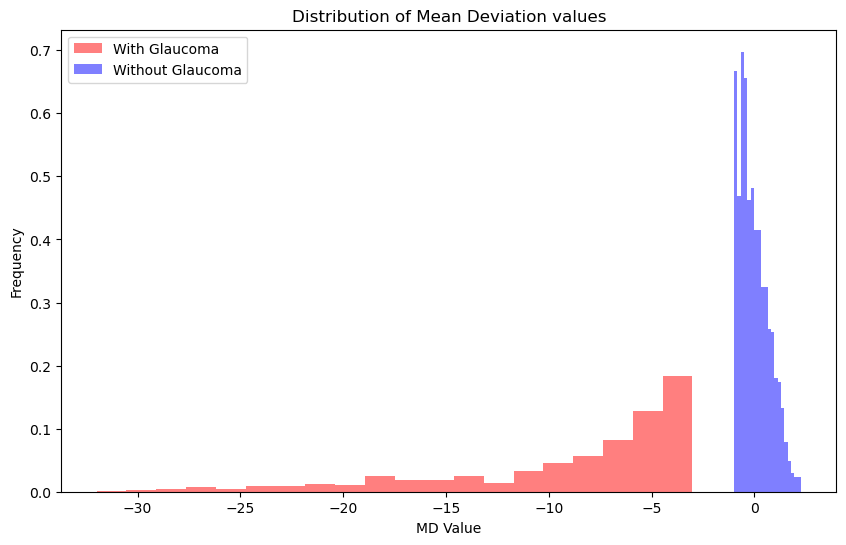

In [10]:
metadata_with_glaucoma = metadata_df[metadata_df['glaucoma'] == 1]
metadata_without_glaucoma = metadata_df[metadata_df['glaucoma'] == 0]

print(f"Number of patients with glaucoma:\t\t{metadata_with_glaucoma.shape[0]}")
print(f"Number of patients without glaucoma:\t{metadata_without_glaucoma.shape[0]}")

# chart distribution of md values
plt.figure(figsize=(10, 6))

plt.hist(metadata_with_glaucoma['md'], bins=20, alpha=0.5, label='With Glaucoma', color='red', density=True)
plt.hist(metadata_without_glaucoma['md'], bins=20, alpha=0.5, label='Without Glaucoma', color='blue', density=True)

plt.xlabel('MD Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Deviation values')
plt.legend()

plt.show()

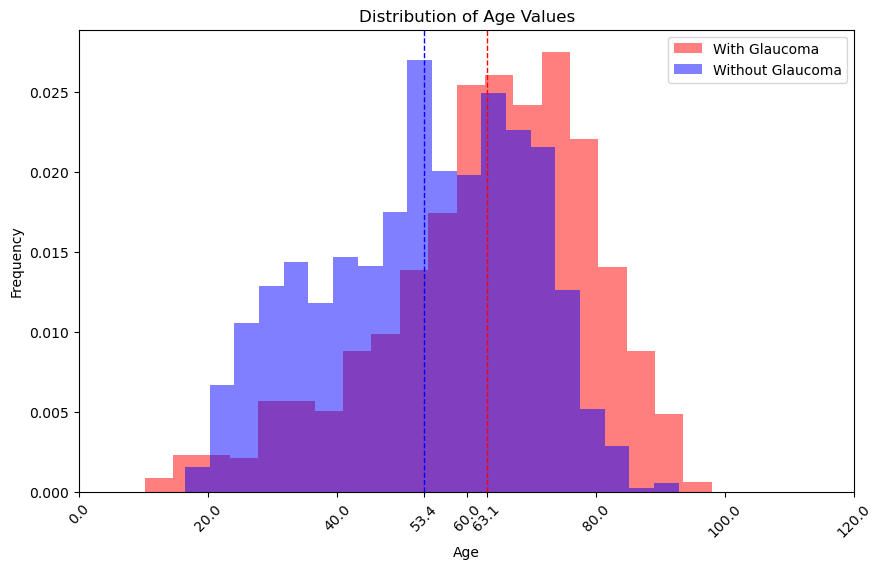

In [11]:
avg_age_with_glaucoma = metadata_with_glaucoma['age'].mean()
avg_age_without_glaucoma = metadata_without_glaucoma['age'].mean()

# Chart distribution of age values
plt.figure(figsize=(10, 6))

plt.hist(metadata_with_glaucoma['age'], bins=20, alpha=0.5, label='With Glaucoma', color='red', density=True)
plt.hist(metadata_without_glaucoma['age'], bins=20, alpha=0.5, label='Without Glaucoma', color='blue', density=True)

# Add vertical lines for average ages
plt.axvline(avg_age_with_glaucoma, color='red', linestyle='dashed', linewidth=1)
plt.axvline(avg_age_without_glaucoma, color='blue', linestyle='dashed', linewidth=1)

# Set x-ticks to include average ages
xticks = list(plt.xticks()[0])
xticks += [avg_age_with_glaucoma, avg_age_without_glaucoma]
plt.xticks(xticks, rotation=45)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Values')
plt.legend()

plt.show()

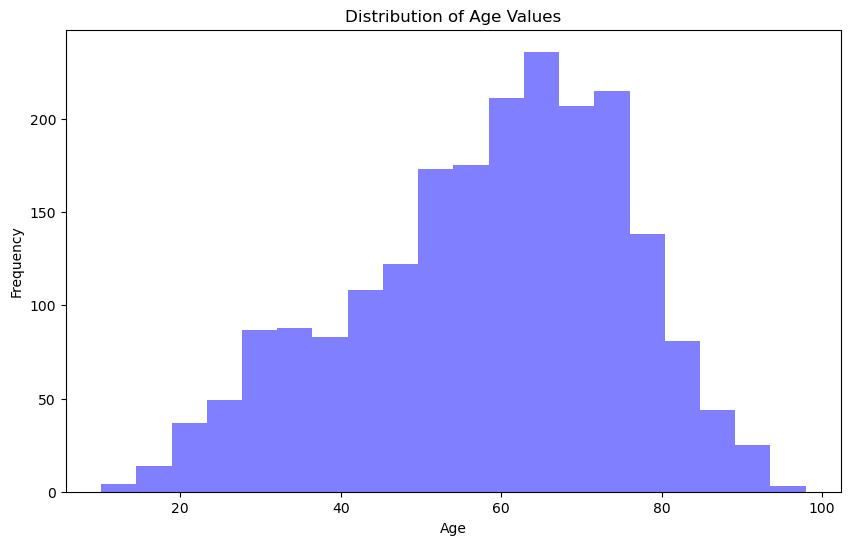

In [12]:
# bar chart of age frequencies using metadata_df
plt.figure(figsize=(10, 6))

metadata_df['age'].plot(kind='hist', bins=20, color='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Values')
plt.show()

In [13]:
metadata_df.head()

,id,md,glaucoma,tds,race,male,hispanic,language,maritalstatus,age
0,1082,-5.14,1,"[-15.0, -6.0, -10.0, -12.0, -6.0, -4.0, -21.0,...",Black or African American,Female,Non-Hispanic,English,Widowed,65.465753
1,1563,-16.39,1,"[-5.0, -8.0, -10.0, -9.0, -24.0, -20.0, -22.0,...",Black or African American,Female,Non-Hispanic,Others,Single,78.180822
2,1008,-7.89,1,"[-22.0, -20.0, -15.0, -12.0, -6.0, -5.0, -9.0,...",Black or African American,Male,Non-Hispanic,English,Single,54.934247
3,945,-3.64,1,"[-9.0, -3.0, 0.0, 0.0, -2.0, -3.0, -3.0, -2.0,...",Black or African American,Female,Non-Hispanic,English,"Married/Civil Union, Life Partner",48.084932
4,1205,-18.97,1,"[-6.0, -3.0, -1.0, 1.0, -9.0, -6.0, -7.0, -10....",Black or African American,Female,Non-Hispanic,Others,"Married/Civil Union, Life Partner",65.660274


In [14]:
# Function to calculate percentage with glaucoma based on a specific column
def calculate_glaucoma_percentage(df, column):
    total_counts = df[column].value_counts()
    glaucoma_counts = df[df['glaucoma'] == 1][column].value_counts()
    percentages = (glaucoma_counts / total_counts) * 100
    return percentages

# Calculate percentages
race_percentage = calculate_glaucoma_percentage(metadata_df, 'race')
ethnicity_percentage = calculate_glaucoma_percentage(metadata_df, 'hispanic')
language_percentage = calculate_glaucoma_percentage(metadata_df, 'language')
marital_status_percentage = calculate_glaucoma_percentage(metadata_df, 'maritalstatus')
gender_percentage = calculate_glaucoma_percentage(metadata_df, 'male')

# Print the results
print("Percentage with Glaucoma based on Race:")
print(race_percentage)
print("\nPercentage with Glaucoma based on Ethnicity:")
print(ethnicity_percentage)
print("\nPercentage with Glaucoma based on Language:")
print(language_percentage)
print("\nPercentage with Glaucoma based on Marital Status:")
print(marital_status_percentage)
print("\nPercentage with Glaucoma based on Gender")
print(gender_percentage)

Percentage with Glaucoma based on Race:
race
Asian                        47.142857
Black or African American    60.571429
White or Caucasian           47.000000
Name: count, dtype: float64

Percentage with Glaucoma based on Ethnicity:
hispanic
Non-Hispanic    51.933124
Unknown         43.089431
Hispanic        57.142857
Name: count, dtype: float64

Percentage with Glaucoma based on Language:
language
English    48.362445
Others     74.885845
Spanish    75.000000
Unknown    57.142857
Name: count, dtype: float64

Percentage with Glaucoma based on Marital Status:
maritalstatus
Married/Civil Union, Life Partner    50.464920
Single                               48.833333
Widowed                              69.827586
Divorced                             56.521739
Unknown                              51.666667
Legally Separated                    61.538462
Name: count, dtype: float64

Percentage with Glaucoma based on Gender
male
Female    49.870578
Male      53.666312
Name: count, dtype: f

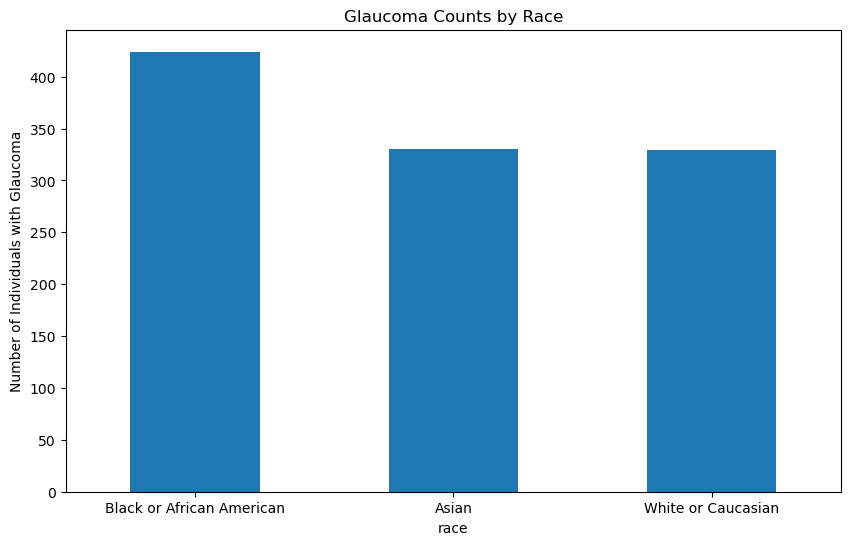

In [21]:
races_of_interest = ['White or Caucasian', 'Black or African American', 'Asian']
filtered_df = metadata_df[metadata_df['race'].isin(races_of_interest)]

# Count the number of individuals with glaucoma for each race
glaucoma_counts = filtered_df[filtered_df['glaucoma'] == 1]['race'].value_counts()

# Plotting
glaucoma_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Glaucoma Counts by Race')
plt.ylabel('Number of Individuals with Glaucoma')
plt.xticks(rotation=0)
plt.show()